In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

In [12]:
res_dir="results/1103journal_clean_dataset"
#res_dir="results/1101journal_lora_change_lr"

json_files = glob.glob(res_dir+'/*.json')
print(len(json_files))
res_list=[]
for json_file in json_files:
    res=json.load(open(json_file))

    for record in res:
        qa_log=record['pred_log']

        score_list={
        "multi":[],
        "gen":[],
        "mmlu":[],
        }
        for qa in qa_log:
            if qa["question_type"]=="mmlu":
                score_list["mmlu"].append(qa["score"])
            elif qa["question_type"]=="original":
                if qa["type"]=="gen":
                    score_list["gen"].append(qa["score"])
                elif qa["type"]=="multi":
                    score_list["multi"].append(qa["score"])

        for key in score_list:
            record[key]=np.mean(score_list[key])

    res_list.extend(res)

15


In [13]:
df=pd.DataFrame(res_list)
df=df[["model_size","bit","epoch","dataset","target_layers","multi","gen","mmlu"]]
df=df.sort_values(by="epoch",ascending=True)
df["LoRA layers"]=df["target_layers"].astype(str).str.count(",")
df["dataset"]=df["model_size"].astype(str)+"-"+df["bit"].astype(str)+"bit-LoRA"+"-"+df["LoRA layers"].astype(str)+"-"+df["dataset"]
df=df.sort_values(by=["model_size","bit","dataset"])
#df=df[df["dataset"].str.contains("test")]

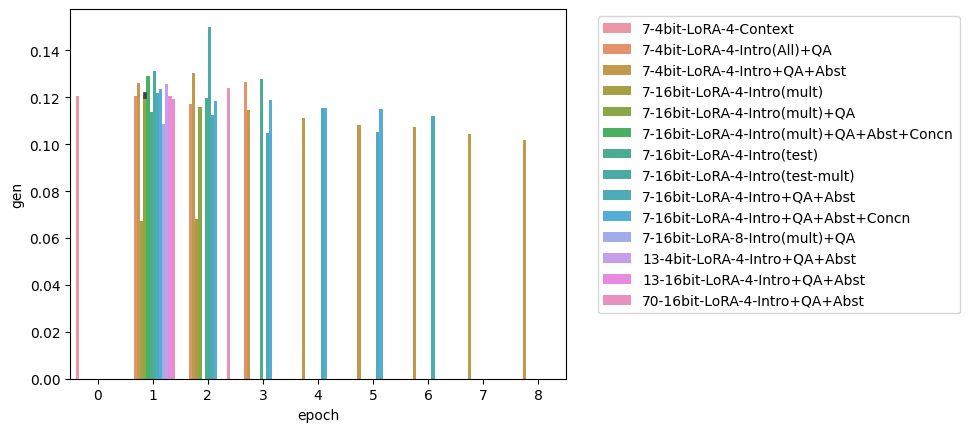

In [14]:
sns.barplot(data=df,x="epoch",y="gen",hue="dataset")
#凡例は外
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))

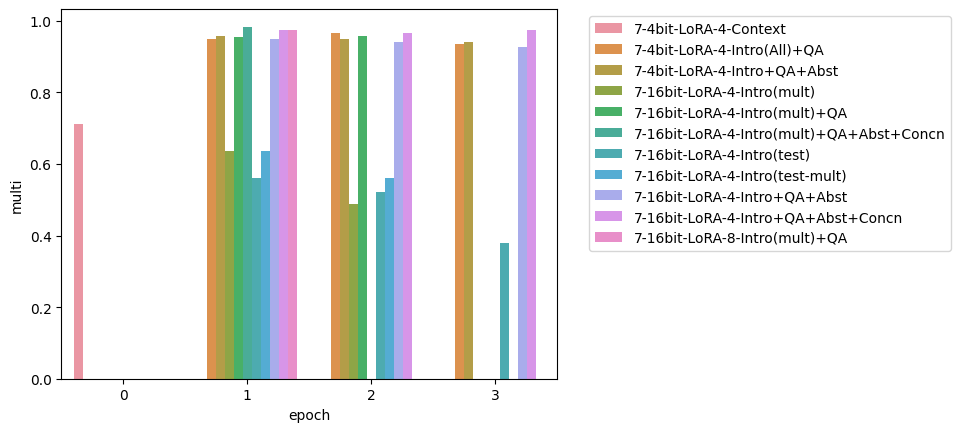

In [29]:
plt.figure(dpi=100)
plt_df=df[df["epoch"]<4].copy()
plt_df=plt_df[plt_df["dataset"].str.find("7-")>=0]
sns.barplot(data=plt_df,x="epoch",y="multi",hue="dataset",errorbar=None)
plt.legend(loc="upper left",bbox_to_anchor=(1.05, 1))